<a href="https://colab.research.google.com/github/rtajeong/M4_new/blob/main/lab_04_xor_nn_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXOR problem

# Let's try to solve this problem using SVC and DecisionTree

In [ ]:
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

from sklearn.svm import SVC
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel="rbf", C=1e-5, gamma=1e-5, probability=True)
clf3 = SVC(kernel="rbf", C=1000, gamma=0.1, probability=True)
clf1.fit(X, Y)
clf2.fit(X, Y.ravel())
clf3.fit(X, Y.ravel())
print(clf1.predict(X))
print(clf2.predict(X))
print(clf3.predict(X))

[1 1 1 1]
[0 1 1 0]
[0 1 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=1)
clf2 = DecisionTreeClassifier(max_depth=2)
clf1.fit(X, Y)
clf2.fit(X, Y)
clf1.predict(X), clf2.predict(X)

(array([0, 0, 0, 0]), array([0, 1, 1, 0]))

## Now, let's try this with Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(22)  # for reproducibility

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W = tf.Variable(tf.random.normal([2, 1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")
# W = tf.Variable([[2.],[10.]])
# b = tf.Variable([3.])


learning_rate = 0.1
lossHistory = []

for step in range(500):
    with tf.GradientTape() as tape:
        hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
        cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) +
                               (1 - Y) * tf.math.log(1 - hypothesis))

    W_grad, b_grad = tape.gradient(cost, [W,b])  # dCost/dw, dCost/db
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    lossHistory.append(cost)

    # if step % 10 == 0: print(step, cost.numpy(), W.numpy(), b.numpy())

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

print(W, b)
print(X.shape, W.shape, Y.shape)
print("\nHypothesis: ", hypothesis.numpy(),
      "\n Correct: ", predicted.numpy(),
      "\n Accuracy: ", accuracy.numpy())



<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.09350818],
       [-0.18570596]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.16563104], dtype=float32)>
(4, 2) (2, 1) (4, 1)

Hypothesis:  [[0.5414751 ]
 [0.49493465]
 [0.5181209 ]
 [0.47152358]] 
 Correct:  [[1.]
 [0.]
 [1.]
 [0.]] 
 Accuracy:  0.5


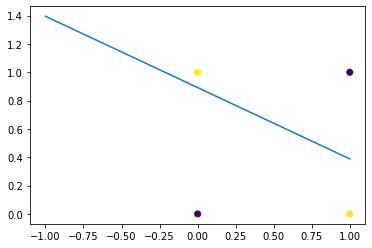

In [ ]:
aa, bb, cc = W[0,0].numpy(), W[1,0].numpy(), b.numpy()
plt.scatter(X[:,0], X[:,1], c=Y)
xx = np.linspace(-1,1,20)
plt.plot(xx, -aa/bb* xx - b/bb)

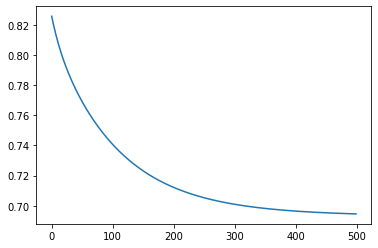

In [ ]:
plt.plot(lossHistory)

# EXOR problem with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=Adam(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))
# print([i.numpy() for i in model.weights])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 55ms/step
[[0.50006366]
 [0.49930763]
 [0.50062037]
 [0.4998643 ]]


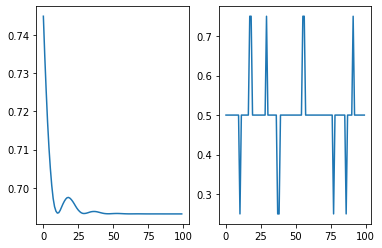

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# EOR problem with two layers (Tensorflow)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(172)  # for reproducibility

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.uniform([2, 2], -1.0, 1.0))
W2 = tf.Variable(tf.random.uniform([2, 1], -1.0, 1.0))
b1 = tf.Variable(tf.random.normal([2]))
b2 = tf.Variable(tf.random.normal([1]))

# if you try the following, you will get accuracy 1.0 (solution already known)
# W1 = tf.Variable([[20.,-20.],[20.,-20.]])
# W2 = tf.Variable([[20.],[20.]])
# b1 = tf.Variable([-10.,30.])
# b2 = tf.Variable([-30.])

learning_rate = 0.1
lossHistory = []

for step in range(500):
    with tf.GradientTape() as tape:
        L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(L2, W2) + b2)
        cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) +
                               (1 - Y) * tf.math.log(1 - hypothesis))

    grads = tape.gradient(cost, [W1, W2, b1, b2])  # dCost/dw, dCost/db
    W1.assign_sub(learning_rate * grads[0])
    W2.assign_sub(learning_rate * grads[1])
    b1.assign_sub(learning_rate * grads[2])
    b2.assign_sub(learning_rate * grads[3])
    lossHistory.append(cost)

    # if step % 10 == 0: print(step, cost.numpy(), W.numpy(), b.numpy())

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

print(W, b)
print(X.shape, W.shape, Y.shape)
print("\nHypothesis: ", hypothesis.numpy(),
      "\n Correct: ", predicted.numpy(),
      "\n Accuracy: ", accuracy.numpy())


<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[0.11284395],
       [0.21281275]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-0.19319409], dtype=float32)>
(4, 2) (2, 1) (4, 1)

Hypothesis:  [[0.49905562]
 [0.51566654]
 [0.48536888]
 [0.50098693]] 
 Correct:  [[0.]
 [1.]
 [0.]
 [1.]] 
 Accuracy:  0.5


- you may or may not have the solution.

# EOR problem with two layers (Keras)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 24        
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 36ms/step
[[0.09155674]
 [0.98443455]
 [0.97162   ]
 [0.01638116]]


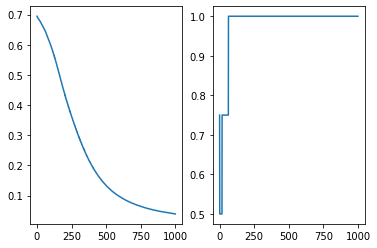

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu')) # input_shape = (dim_1, dim2, ...)
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=1000, batch_size=4, verbose=0)
print(model.predict(X))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# Try deep network with sigmoid

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 24        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 8)                

1/1 [==============================] - 0s 76ms/step
[[0.4900174 ]
 [0.4900185 ]
 [0.49001828]
 [0.49001902]]


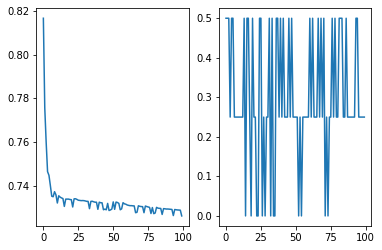

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=100, batch_size=1, verbose=0)
print(model.predict(X))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# Now, we change activation function to "relu"

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 24        
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable 

1/1 [==============================] - 0s 70ms/step
[[0.00341167]
 [0.99279046]
 [0.9936838 ]
 [0.00232105]]


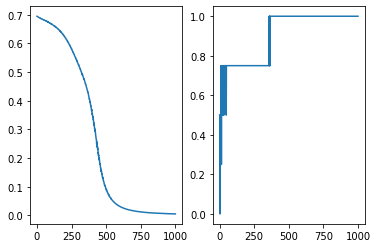

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

history = model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=1000, batch_size=1, verbose=0)
print(model.predict(X))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# Exercise (연습)

In [ ]:
hypothesis = 0.401
hypothesis > 0.5
tf.cast(hypothesis > 0.5, dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
a = tf.constant(True)
tf.cast(a, dtype=tf.float32) + 1.0

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

- exam

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [0]])

clf1 = SVC(kernel='linear')
clf2 = DecisionTreeClassifier(max_depth=1)
clf1.fit(X, Y)
clf2.fit(X, Y)
print(clf1.predict(X), clf2.predict(X))

[1 1 1 1] [0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf3 = SVC(kernel="rbf")
clf4 = DecisionTreeClassifier(max_depth=2)
clf3.fit(X, Y)
clf4.fit(X, Y)
clf3.predict(X), clf4.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0, 1, 1, 0]), array([0, 1, 1, 0]))